# 課題 Car Fuel Consumption
ガソリンの消費量を予測する

## フィードバックを受けてDay1の修正
①　import文を先頭にまとめて書く  
②　temp_insideを可視化して欠損値を判断する  
③　相関係数が高い説明変数を削除する  
④　異常値の確認

## Day1

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 1. データセットの確認、前処理

In [2]:
df_rawdata = pd.read_csv('../1180504/measurements.csv')
display(df_rawdata)
df_rawdata.info()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null object
consume          388 non-null object
speed            388 non-null int64
temp_inside      376 non-null object
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null object
refill gas       13 non-null object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [3]:
# distance, consume, temp_insideの型をfloatに変更
df_rawdata['distance']=df_rawdata['distance'].str.replace(',','.').astype(float)
df_rawdata['consume']=df_rawdata['consume'].str.replace(',','.').astype(float)
df_rawdata['temp_inside']=df_rawdata['temp_inside'].str.replace(',','.').astype(float)

display(df_rawdata)
df_rawdata.info()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      376 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null object
refill gas       13 non-null object
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


In [4]:
# specials, refill liters, refill gasは他の変数と情報が重複しているため削除
df_data=df_rawdata.drop(['specials','refill liters','refill gas'],axis=1)
display(df_data)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [5]:
# gas_typeはE10 = 0, SP98 = 1としてダミー変数に変更
lr=LabelEncoder()
df_data['gas_type']=lr.fit_transform(df_data['gas_type'])
display(df_data)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,1,0,0,0
384,16.1,4.3,38,25.0,31,1,1,0,0
385,16.0,3.8,45,25.0,19,1,0,0,0
386,15.4,4.6,42,25.0,31,1,1,0,0


In [6]:
#欠損値の確認
df_data.isnull().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
dtype: int64

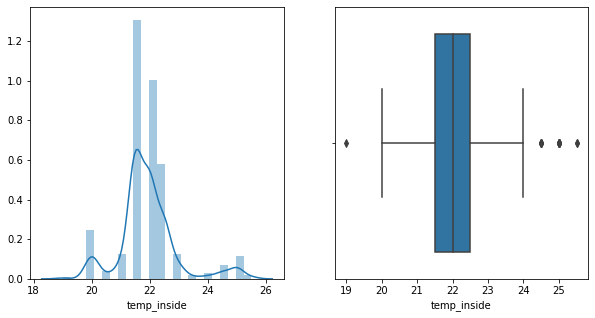

In [7]:
# temp_insideの欠損値の補完方法を考えるため可視化
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(df_data['temp_inside'].dropna(), ax=ax[0])
sns.boxplot(df_data['temp_inside'].dropna(), ax=ax[1])

In [8]:
# 大きなばらつきは無く20~24℃の範囲で概ね収まっているので、欠損値を平均値で補完
df_data['temp_inside'].fillna(df_data['temp_inside'].mean(), inplace=True)

#欠損値の確認
df_data.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

### 2. 可視化

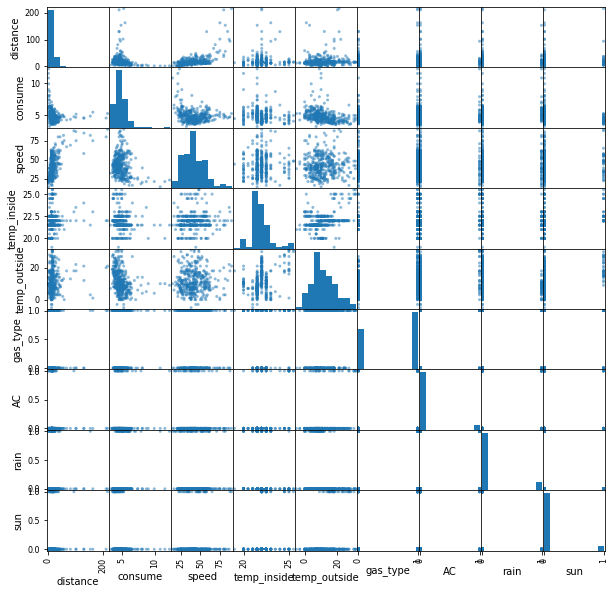

In [9]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_data, figsize=(10,10))
plt.show()

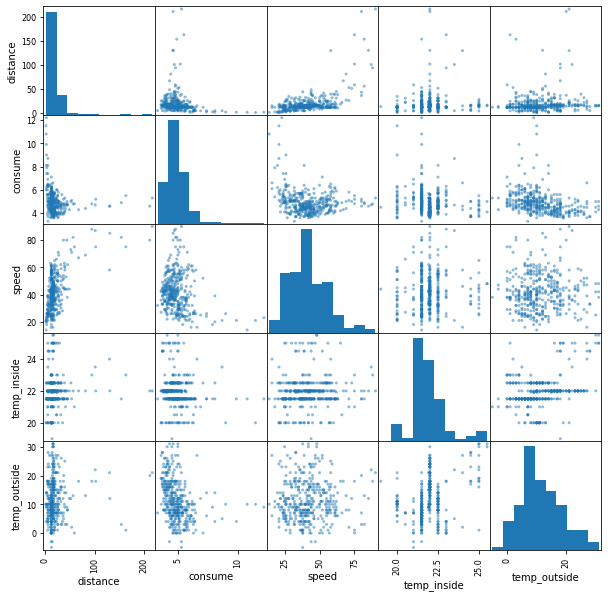

In [10]:
# ダミー変数（gas_type, AC, rain, sun）は除いて散布図行列を書く
pd.plotting.scatter_matrix(df_data[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside']], figsize=(10,10))
plt.show()

In [11]:
# 相関係数を確認
df_data[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside']].corr()

,distance,consume,speed,temp_inside,temp_outside
distance,1.000000,-0.128967,0.562299,0.075178,0.088175
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811
speed,0.562299,-0.227866,1.000000,0.059293,0.015411
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000


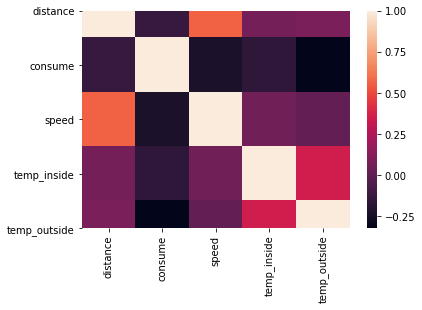

In [12]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_data[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside']].corr())
plt.show()

distanceとspeedに正の相関が見られる。Day2で無相関化できるがここでは多重共線性を防ぐため、consumeと関係が小さそうなspeedを説明変数から除く。

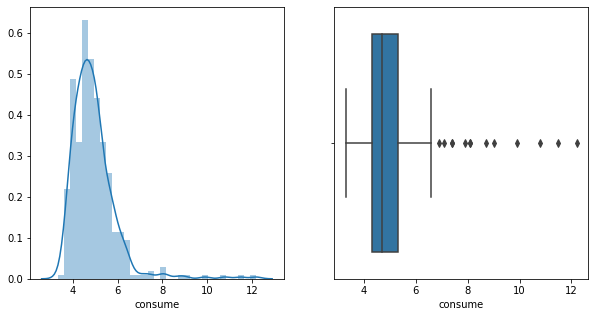

In [13]:
# 散布図を見ると目的変数であるconsumeのデータに異常値が含まれているので可視化
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(df_data['consume'], ax=ax[0])
sns.boxplot(df_data['consume'], ax=ax[1])

In [14]:
# 箱ひげ図からおよそ7以上のデータは異常値となっている。consumeが7未満と7以上のデータについて他の変数に有意な差が無いか確認
df_data[df_data['consume'] < 7].describe()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,20.161170,4.781649,42.454787,21.940570,11.468085,0.587766,0.071809,0.117021,0.085106
std,22.839185,0.679536,13.368144,0.994628,7.038109,0.492893,0.258515,0.321874,0.279412
min,2.000000,3.300000,16.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,11.875000,4.300000,33.000000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,15.400000,4.700000,41.000000,22.000000,10.000000,1.000000,0.000000,0.000000,0.000000
75%,19.650000,5.200000,50.000000,22.500000,16.000000,1.000000,0.000000,0.000000,0.000000
max,216.100000,6.900000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df_data[df_data['consume'] >= 7].describe()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,3.725000,9.008333,25.416667,21.583333,7.916667,0.583333,0.250000,0.333333,0.0
std,3.020874,1.710640,10.326122,0.973124,4.209477,0.514929,0.452267,0.492366,0.0
min,1.300000,7.100000,14.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.000000,7.775000,20.750000,21.500000,4.750000,0.000000,0.000000,0.000000,0.0
50%,2.650000,8.400000,22.000000,21.500000,9.000000,1.000000,0.000000,0.000000,0.0
75%,4.950000,10.125000,26.000000,21.750000,10.000000,1.000000,0.250000,1.000000,0.0
max,12.300000,12.200000,52.000000,23.500000,14.000000,1.000000,1.000000,1.000000,0.0


consumeが7未満と7以上のデータを比べると、7以上のデータはdistanceが極端に小さい。一般的には走行距離が長いほど燃料消費量も多くなるため、通常の走行とは異なるデータであると考えられる。  
例えば渋滞時や駐車時など停止時間が長いデータである可能性が考えられる。説明変数に停止時間等のデータがあればこれらのデータも上手く予測できると考えられるが、手持ちのデータには含まれないため異常値として削除する。

In [16]:
#consumeが7以上のデータを異常値として削除
df_data = df_data[df_data['consume'] < 7]

### 3. 機械学習モデルの構築

目的変数：consume  
説明変数：distance, temp_inside, temp_outside, gas_type, AC, rain, sun

#### 3-1. 線形回帰モデル

In [17]:
# 係数を求める
y = df_data["consume"].values
X = df_data[['distance', 'temp_inside', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
w4 = regr.coef_[3]
w5 = regr.coef_[4]
w6 = regr.coef_[5]
w7 = regr.coef_[6]

In [18]:
x1 = df_data['distance'].values
x2 = df_data['temp_inside'].values
x3 = df_data['temp_outside'].values
x4 = df_data['gas_type'].values
x5 = df_data['AC'].values
x6 = df_data['rain'].values
x7 = df_data['sun'].values

# 重みと二乗誤差の確認
y_est = w0 + w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4 + w5 * x5 + w6 * x6 + w7 * x7
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}, w6 = {:.3f}, w7 = {:.3f}'.format(w0, w1, w2, w3, w4, w5, w6, w7))
print('二乗誤差 = {:.3f}'.format(squared_error))

w0 = 5.507, w1 = -0.001, w2 = -0.015, w3 = -0.035, w4 = -0.021, w5 = 0.205, w6 = 0.333, w7 = -0.151
二乗誤差 = 68.553


### 4. モデルの評価

In [19]:
# 値を予測
y_pred = regr.predict(X)

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.365
MAE = 0.48
RMSE = 0.604


Day1提出時と修正後の予測誤差は以下の通り。  
Day1提出時：MSE = 0.845, MAE = 0.618, RMSE = 0.919  
Day1修正後：MSE = 0.365, MAE = 0.480, RMSE = 0.604

修正後の方が予測精度が向上していることが分かる。
Day2以降でさらなる精度向上を目指す。

## Day2

実施内容  
① 標準化によりデータのスケールを揃える  
② 無相関化により多重共線性を防ぐ  
③ 交差検証法によりモデルの汎化性能を確認する  
④ 過学習しているか確認し、正則化を取り入れるか検討する   
⑤ グリッドサーチによりハイパーパラメータの探索を行う

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import Ridge,Lasso,ElasticNet 

### 1. データ前処理

In [21]:
# データを無相関化
# Day1で相関が見られたdistanceとspeedを無相関化する
data_distance_speed = df_data[['distance', 'speed']]
cov = np.cov(data_distance_speed, rowvar=0) # 分散・共分散を求める
_, S = np.linalg.eig(cov)           # 分散共分散行列の固有ベクトルを用いて
data_decorr = np.dot(S.T, data_distance_speed.T).T #データを無相関化

相関係数: -0.000


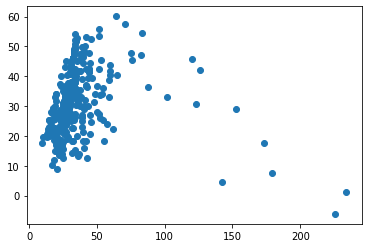

In [22]:
# 無相関化されたか確認
print('相関係数: {:.3f}'.format(np.corrcoef(data_decorr[:, 0], data_decorr[:, 1])[0,1]))
plt.plot(data_decorr[:, 0], data_decorr[:, 1], 'o')
plt.show()

In [23]:
# 無相関化したデータを新しく変数として追加
df_data['distance_decorr'] = data_decorr[:, 0]
df_data['speed_decorr'] = data_decorr[:, 1]
df_data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,distance_decorr,speed_decorr
0,28.0,5.0,26,21.5,12,0,0,0,0,35.777696,13.414786
1,12.0,4.2,30,21.5,13,0,0,0,0,22.496508,23.192825
2,11.2,5.5,38,21.5,15,0,0,0,0,24.795413,30.897047
3,12.9,3.9,36,21.5,14,0,0,0,0,25.608248,28.401191
4,18.5,4.5,46,21.5,15,0,0,0,0,34.587150,35.524345
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,1,0,0,0,29.615477,29.998725
384,16.1,4.3,38,25.0,31,1,1,0,0,29.328114,29.035698
385,16.0,3.8,45,25.0,19,1,0,0,0,31.894680,35.548972
386,15.4,4.6,42,25.0,31,1,1,0,0,30.200054,33.001769


### 2. 交差検証法による汎化性能の確認

まずはDay1と同じ線形回帰モデルで汎化性能を確認する。  
目的変数：consume  
説明変数：distance_decorr, speed_decorr, temp_inside, temp_outside, gas_type, AC, rain, sun

また説明変数は学習の前に標準化を行う。

In [24]:
y = df_data["consume"].values
X = df_data[['distance_decorr', 'speed_decorr', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

n_split = 10

cross_valid_mse = 0
cross_valid_mae = 0
cross_valid_rmse = 0

for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    # 標準化
    stdsc = StandardScaler()
    X_train_stand = stdsc.fit_transform(X_train)
    X_test_stand = stdsc.transform(X_test)
    
    # モデルの学習
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train_stand, y_train)

    # テストデータに対する予測を実行
    y_pred_test = regr.predict(X_test_stand)
    
    # テストデータに対する予測誤差を計算
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    
    cross_valid_mse += mse
    cross_valid_mae += mae
    cross_valid_rmse += rmse

# 最終的な汎化誤差を出力する
final_mse = cross_valid_mse / n_split
final_mae = cross_valid_mae / n_split
final_rmse = cross_valid_rmse / n_split
print("Cross Validation MSE = %s"%round(final_mse, 3))
print("Cross Validation MAE = %s"%round(final_mae, 3))
print("Cross Validation RMSE = %s"%round(final_rmse, 3))

Cross Validation MSE = 0.381
Cross Validation MAE = 0.49
Cross Validation RMSE = 0.615


Day1での誤差とほとんど変化していない。
（Day1修正後：MSE = 0.365, MAE = 0.480, RMSE = 0.604）

### 3. ホールドアウト法による過学習の確認

In [25]:
y = df_data["consume"].values
X = df_data[['distance_decorr', 'speed_decorr', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

test_size = 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

# 標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
X_test_stand = stdsc.transform(X_test)

# 学習用データを使って線形回帰モデルを学習
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train_stand, y_train)

# 学習用データに対する予測を実行
y_pred_train = regr.predict(X_train_stand)

# 学習データに対するMAEを計算（訓練誤差の評価）
mae = mean_absolute_error(y_train, y_pred_train)
print("訓練誤差　MAE = %s"%round(mae,3) )

# テストデータに対する予測を実行
y_pred_test = regr.predict(X_test_stand)

# テストデータに対するMAEを計算（汎化誤差の評価）
mae = mean_absolute_error(y_test, y_pred_test)
print("汎化誤差　MAE = %s"%round(mae,3) )

訓練誤差　MAE = 0.492
汎化誤差　MAE = 0.422


訓練誤差と汎化誤差に差がないので過学習は起きていないと考えられる。
そのため今回は正則化は不要であるが、練習のためRidgeとLassoを適用する。

### 4.  正則化

#### 4-1. Ridge

In [26]:
y = df_data["consume"].values
X = df_data[['distance_decorr', 'speed_decorr', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

test_size = 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

# 標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
X_test_stand = stdsc.transform(X_test)

#グリッドサーチによりハイパーパラメータを探索する
alpha_param = np.logspace(-3, 3, 7)
parameters = {'alpha':alpha_param}
model = Ridge()
ridge = GridSearchCV(model, parameters, cv=3)
ridge.fit(X_train_stand, y_train)
print(ridge.best_params_)

# 最適パラメータを用いてテストデータを予測する
ridge2 = Ridge(**ridge.best_params_)
ridge2.fit(X_train_stand, y_train)
y_pred_test = ridge2.predict(X_test_stand)
mae = mean_absolute_error(y_test, y_pred_test)
print("汎化誤差　MAE = %s"%round(mae,3) )

{'alpha': 100.0}
汎化誤差　MAE = 0.42


#### 4-2. Lasso

In [27]:
y = df_data["consume"].values
X = df_data[['distance_decorr', 'speed_decorr', 'temp_outside', 'gas_type', 'AC', 'rain', 'sun']].values

test_size = 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

# 標準化
stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
X_test_stand = stdsc.transform(X_test)

#グリッドサーチによりハイパーパラメータを探索する
alpha_param = np.logspace(-3, 3, 7)
parameters = {'alpha':alpha_param}
model = Lasso()
lasso = GridSearchCV(model, parameters, cv=3)
lasso.fit(X_train_stand, y_train)
print(lasso.best_params_)

# 最適パラメータを用いてテストデータを予測する
lasso2 = Lasso(**lasso.best_params_)
lasso2.fit(X_train_stand, y_train)
y_pred_test = lasso2.predict(X_test_stand)
mae = mean_absolute_error(y_test, y_pred_test)
print("汎化誤差　MAE = %s"%round(mae,3) )

{'alpha': 0.01}
汎化誤差　MAE = 0.422


RidgeでもLassoでも正則化なしのモデルと汎化誤差は同程度であり、今回は過学習を起こしていないため正則化の効果は低いことが分かった。  
Day3以降では線形回帰以外のモデルを構築して精度向上を目指す。